In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
f = r'C:\Users\Abe\Google Drive\Data Science Bootcamp\Unit 3\Potpourrie\Housing\Melbourne_housing_extra_data.csv'

df = pd.read_csv(f)
df.shape

(17407, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17407 entries, 0 to 17406
Data columns (total 21 columns):
Suburb           17407 non-null object
Address          17407 non-null object
Rooms            17407 non-null int64
Type             17407 non-null object
Price            13525 non-null float64
Method           17407 non-null object
SellerG          17407 non-null object
Date             17407 non-null object
Distance         17407 non-null float64
Postcode         17407 non-null int64
Bedroom2         13625 non-null float64
Bathroom         13625 non-null float64
Car              13625 non-null float64
Landsize         13603 non-null float64
BuildingArea     7323 non-null float64
YearBuilt        8429 non-null float64
CouncilArea      13601 non-null object
Lattitude        13737 non-null float64
Longtitude       13737 non-null float64
Regionname       17407 non-null object
Propertycount    17407 non-null int64
dtypes: float64(10), int64(3), object(8)
memory usage: 2.8+ MB


In [4]:
# Convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert Postcode to Object
df['Postcode'] = df['Postcode'].astype(object)

In [5]:
df.notnull().sum() / df.shape[0] * 100

Suburb           100.000000
Address          100.000000
Rooms            100.000000
Type             100.000000
Price             77.698627
Method           100.000000
SellerG          100.000000
Date             100.000000
Distance         100.000000
Postcode         100.000000
Bedroom2          78.273109
Bathroom          78.273109
Car               78.273109
Landsize          78.146723
BuildingArea      42.069282
YearBuilt         48.423048
CouncilArea       78.135233
Lattitude         78.916528
Longtitude        78.916528
Regionname       100.000000
Propertycount    100.000000
dtype: float64

In [6]:
drop_col = ['BuildingArea','YearBuilt','Lattitude','Longtitude','Address']

df.drop(drop_col,axis=1,inplace=True)
df = df[df['Price'].notnull()]

df_drop = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525 entries, 1 to 17405
Data columns (total 16 columns):
Suburb           13525 non-null object
Rooms            13525 non-null int64
Type             13525 non-null object
Price            13525 non-null float64
Method           13525 non-null object
SellerG          13525 non-null object
Date             13525 non-null datetime64[ns]
Distance         13525 non-null float64
Postcode         13525 non-null object
Bedroom2         10597 non-null float64
Bathroom         10597 non-null float64
Car              10597 non-null float64
Landsize         10582 non-null float64
CouncilArea      10581 non-null object
Regionname       13525 non-null object
Propertycount    13525 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage: 1.8+ MB


In [7]:
df['Bedroom2'].describe()

count    10597.000000
mean         2.841087
std          0.967595
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: Bedroom2, dtype: float64

In [8]:
# Fill Bedroom 2 to value for Rooms when Bedroom2 is NA or 0 
df['Bedroom2'].fillna(df['Rooms'],inplace=True)
df.loc[df['Bedroom2'] == 0, 'Bedroom2'] = df['Rooms']

In [9]:
# Impute values for Bathroom and Car by taking the average ratio and multiplying by bedrooms
bath_bed = (df['Bathroom'] / df['Bedroom2']).mean()
car_bed = (df['Car'] / df['Bedroom2']).mean()

df['Bathroom'].fillna(df['Bedroom2']*bath_bed,inplace=True)
df['Car'].fillna(df['Bedroom2']*car_bed,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13525 entries, 1 to 17405
Data columns (total 16 columns):
Suburb           13525 non-null object
Rooms            13525 non-null int64
Type             13525 non-null object
Price            13525 non-null float64
Method           13525 non-null object
SellerG          13525 non-null object
Date             13525 non-null datetime64[ns]
Distance         13525 non-null float64
Postcode         13525 non-null object
Bedroom2         13525 non-null float64
Bathroom         13525 non-null float64
Car              13525 non-null float64
Landsize         10582 non-null float64
CouncilArea      10581 non-null object
Regionname       13525 non-null object
Propertycount    13525 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(2), object(7)
memory usage: 2.4+ MB


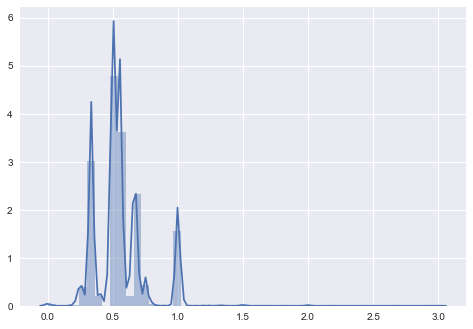

0.1943172415001489


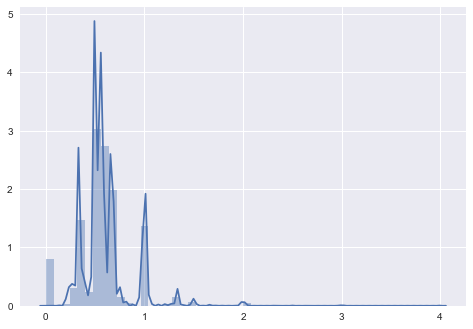

0.28931047592978526


In [10]:
bath_ratio = df['Bathroom'] / df['Bedroom2']
car_ratio = df['Car'] / df['Bedroom2']

# with pd.option_context('mode.use_inf_as_null',True):
#     bath_ratio.dropna(inplace=True)

for ratio in (bath_ratio,car_ratio):
    sns.distplot(ratio)
    plt.show()
    print(ratio.std())

In [11]:
# Impute NaN Landsize by taking the average landsize per room
# IF not enough data then just use average landsize
# Drop any suburbs which have no informtion

avg_landsize_room = df.groupby(['Suburb','Rooms'])['Landsize'].transform('mean')
avg_landsize = df.groupby(['Suburb'])['Landsize'].transform('mean')

df['avg_landsize_room'] = avg_landsize_room
df['avg_landsize'] = avg_landsize

df.loc[df['avg_landsize_room'].isnull(), 'avg_landsize_room'] = df['avg_landsize']
df.loc[df['Landsize'].isnull(), 'Landsize'] = df['avg_landsize_room']

df = df[df['Landsize'].notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13501 entries, 1 to 17405
Data columns (total 18 columns):
Suburb               13501 non-null object
Rooms                13501 non-null int64
Type                 13501 non-null object
Price                13501 non-null float64
Method               13501 non-null object
SellerG              13501 non-null object
Date                 13501 non-null datetime64[ns]
Distance             13501 non-null float64
Postcode             13501 non-null object
Bedroom2             13501 non-null float64
Bathroom             13501 non-null float64
Car                  13501 non-null float64
Landsize             13501 non-null float64
CouncilArea          10581 non-null object
Regionname           13501 non-null object
Propertycount        13501 non-null int64
avg_landsize_room    13501 non-null float64
avg_landsize         13501 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(7)
memory usage: 2.0+ MB


In [12]:
# Impute values for Council Area by using the same council name for the same suburb name

def fill_council(x):
    y = x.dropna().mode()
    if len(y) > 1:
        print(x)
        raise ValueError
    elif len(y) < 1:
        return np.nan
    else:
        return y[0]
    
    
df['imputed_council'] = df.groupby(['Suburb'])['CouncilArea'].transform(fill_council)
df.loc[df['CouncilArea'].isnull(),'CouncilArea'] = df['imputed_council']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13501 entries, 1 to 17405
Data columns (total 19 columns):
Suburb               13501 non-null object
Rooms                13501 non-null int64
Type                 13501 non-null object
Price                13501 non-null float64
Method               13501 non-null object
SellerG              13501 non-null object
Date                 13501 non-null datetime64[ns]
Distance             13501 non-null float64
Postcode             13501 non-null object
Bedroom2             13501 non-null float64
Bathroom             13501 non-null float64
Car                  13501 non-null float64
Landsize             13501 non-null float64
CouncilArea          13501 non-null object
Regionname           13501 non-null object
Propertycount        13501 non-null int64
avg_landsize_room    13501 non-null float64
avg_landsize         13501 non-null float64
imputed_council      13501 non-null object
dtypes: datetime64[ns](1), float64(8), int64(2), object(8)
m

In [13]:
drop_col = ['avg_landsize_room','imputed_council','avg_landsize']
df.drop(drop_col,axis=1,inplace=True)

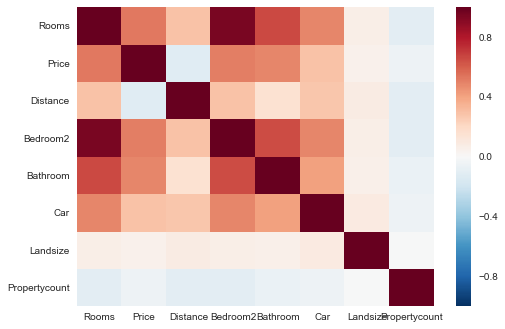

In [14]:
sns.heatmap(df.corr())
plt.show()

In [17]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(plt.scatter)
g.map_lower(sns.regplot) # scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot)

plt.show()

KeyboardInterrupt: 

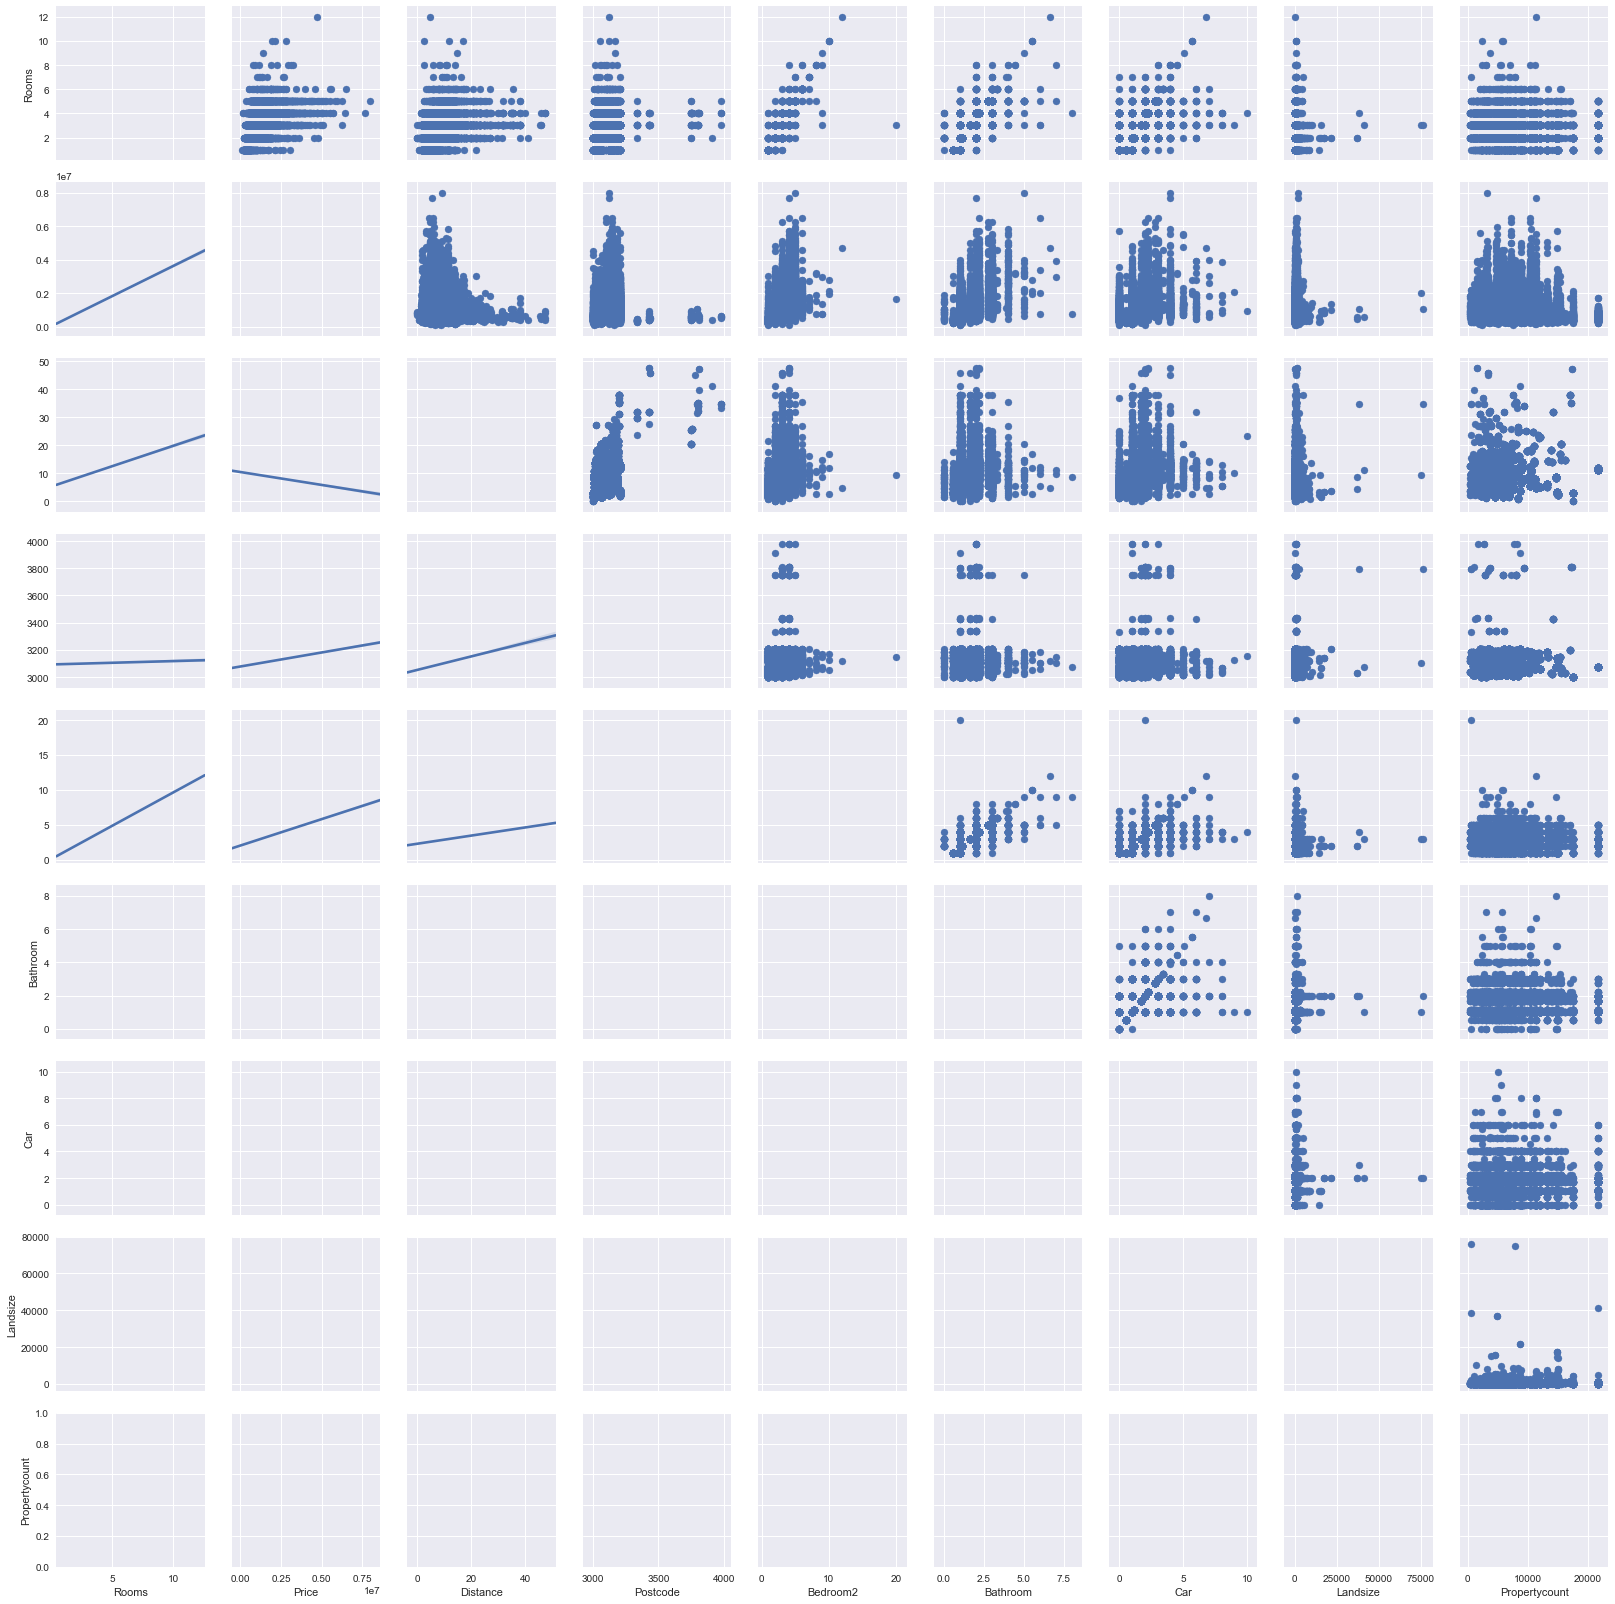

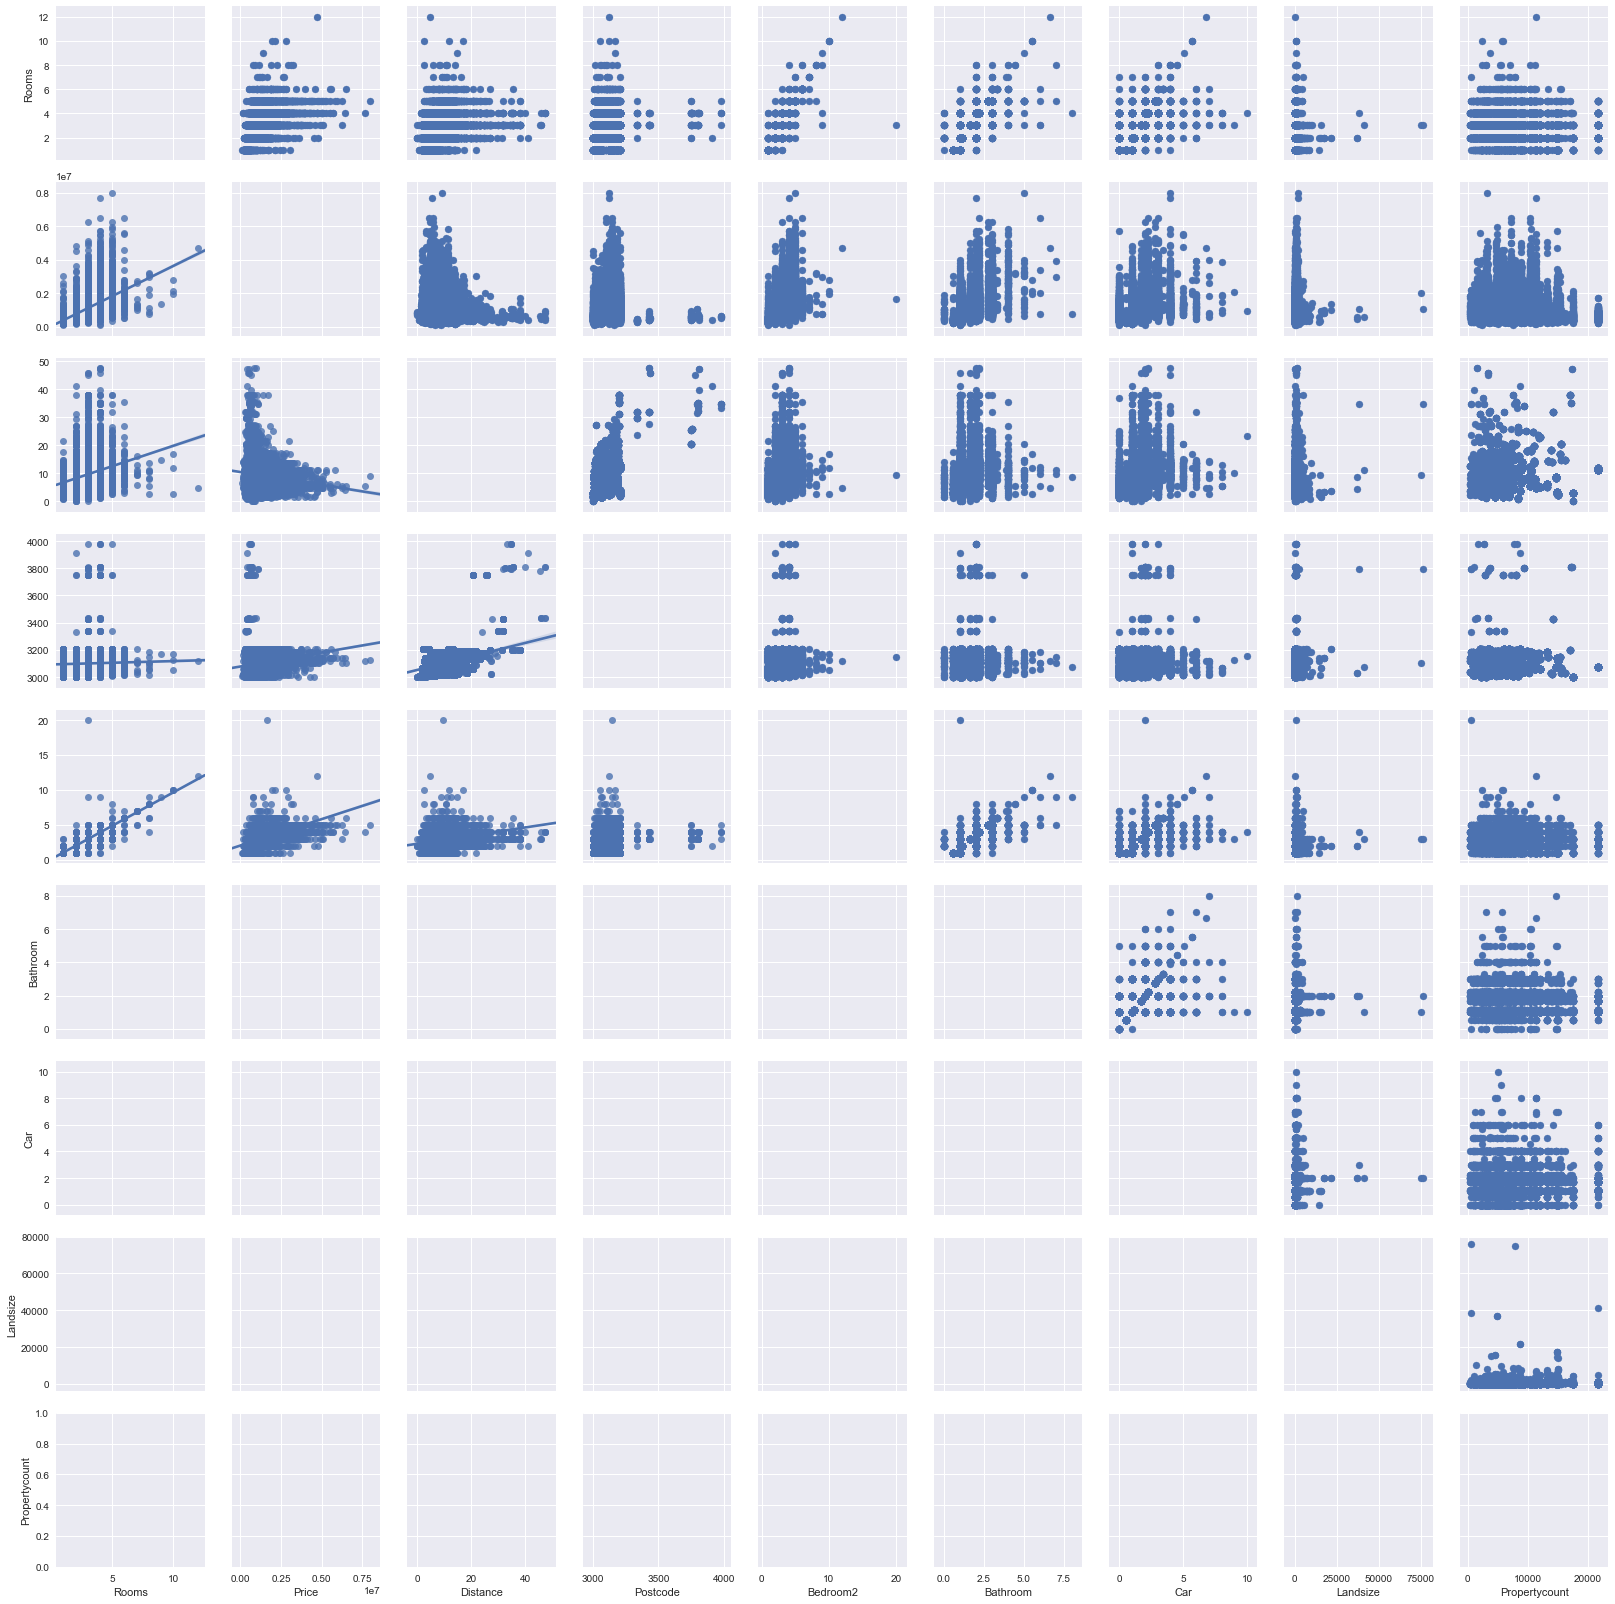

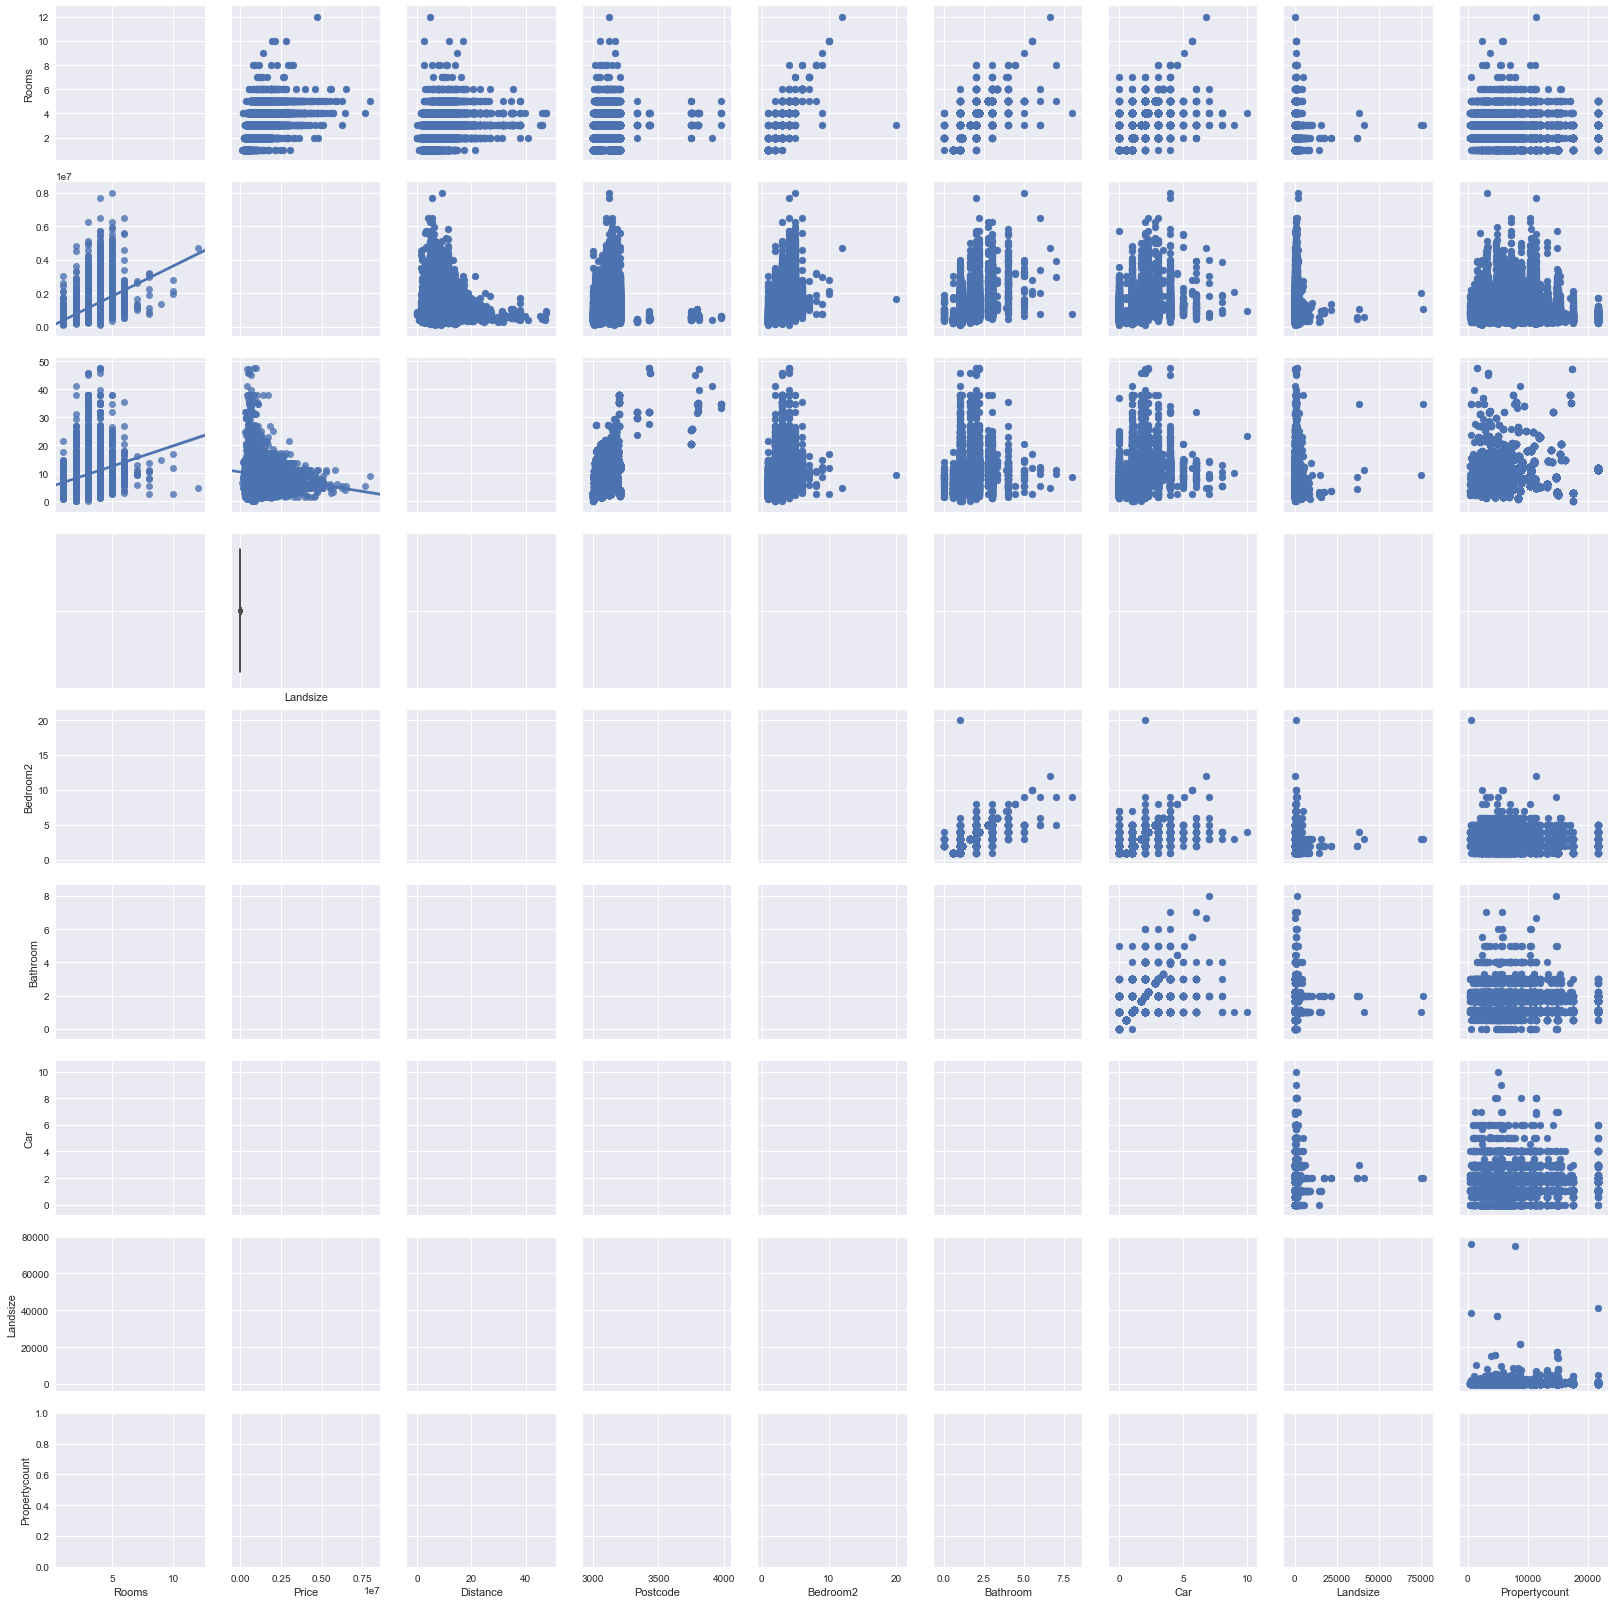

0.0012591659877


count    13501.000000
mean       500.788316
std       1320.556443
min          0.000000
25%        192.000000
50%        438.000000
75%        626.750000
max      76000.000000
Name: Landsize, dtype: float64

In [18]:
# Landsize seems to have some interesting outliers

sns.boxplot(df[df['Landsize'] < 10000]['Landsize'])
plt.show()

print((df['Landsize'] > 10000).sum() / df.shape[0])
df['Landsize'].describe()

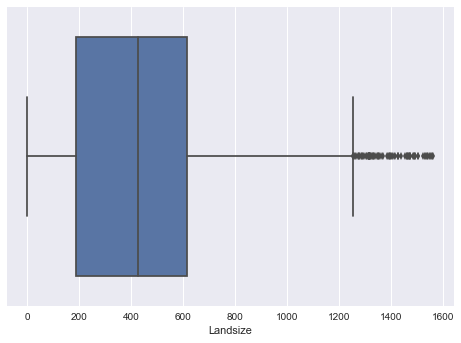

In [19]:
# Remove some outliers
q = df['Landsize'].quantile(.98)
df = df.loc[df['Landsize'] < q,:]

sns.boxplot(df['Landsize'])
plt.show()

In [20]:
categorical = df.select_dtypes(include=['object'])

for category in categorical:
    column = df[category]
    print ('{}: {}'.format(category, column.nunique()))
    if column.nunique() < 50:
        print(column.unique())

Suburb: 282
Type: 3
['h' 't' 'u']
Method: 5
['S' 'SP' 'PI' 'VB' 'SA']
SellerG: 261
Postcode: 181
CouncilArea: 32
['Yarra' 'Moonee Valley' 'Port Phillip' 'Darebin' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse' 'Maribyrnong'
 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne' 'Kingston'
 'Brimbank' 'Hume' 'Knox' 'Maroondah' 'Casey' 'Melton' 'Greater Dandenong'
 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges' 'Yarra Ranges'
 'Wyndham' 'Cardinia' 'Unavailable']
Regionname: 8
['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


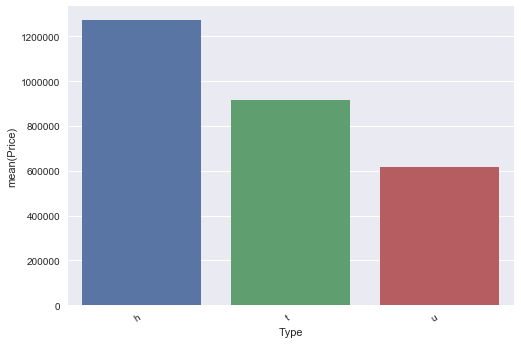

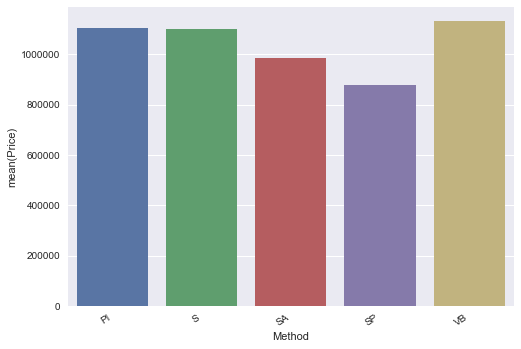

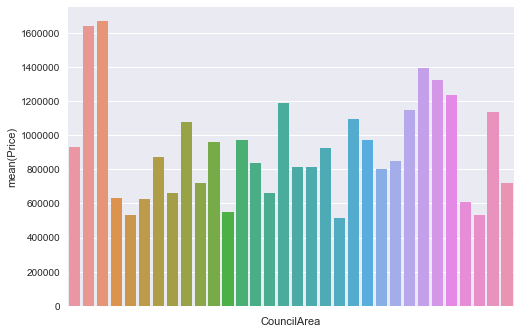

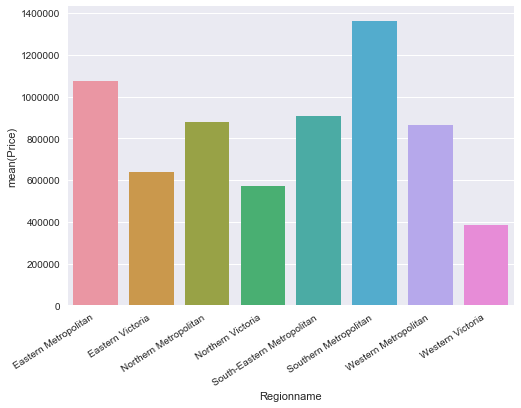

In [21]:
# Visually inspect variance between categorical variables

for category in categorical:
    column = df[category]
    if column.nunique() < 10:
        df_ss = df.groupby(column).mean()
        ax = sns.barplot(x=df_ss.index,y=df_ss['Price'])
        plt.xticks(rotation=33, horizontalalignment='right')
        plt.show()
    elif column.nunique() < 50:
        df_ss = df.groupby(column).mean()
        ax = sns.barplot(x=df_ss.index,y=df_ss['Price'])
        ax.set(xticklabels=[])
        plt.show()

C:\Users\Abe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abe\Anaconda3\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


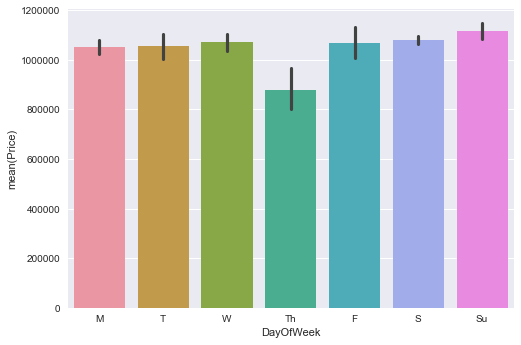

In [22]:
# Dive into differences in properties sold by day of week
df['DayOfWeek'] = df['Date'].dt.dayofweek

days = ['M','T','W','Th','F','S','Su']
df['DayOfWeek'].replace(range(0,7,1),days,inplace=True)

sns.barplot(x=df['DayOfWeek'],y=df['Price'], order=days)
plt.show()

In [25]:
df_dum = pd.get_dummies(df)
df_dum.drop('Date',axis=1,inplace=True)
X = df_dum.loc[:,df_dum.columns != 'Price']
y = df_dum['Price']

In [26]:
X.shape

(13230, 786)

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
# lasso = Lasso(alpha=1)


# cross_val_score(lasso,X,y)

In [ ]:
# Try elastic net
# Add features thinking from the perspective of a developer (bedrooms/landsize, etc...)
# Turn the co-efficients into a dataframe

In [30]:
for num in range(1,6,1):
    lasso = Lasso(alpha=num)
    scores = cross_val_score(lasso, X, y, cv=5)
    print(num)
    print(scores)
    print(scores.mean())

C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

1
[ 0.68387612  0.69915854  0.55765607  0.64896313  0.55195201]
0.628321172943


C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

2
[ 0.68461453  0.69932725  0.5586859   0.64956035  0.57502533]
0.633442669585


C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

3
[ 0.68508088  0.69956912  0.55942141  0.65008664  0.58615911]
0.636063433913


C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

4
[ 0.68544878  0.69967369  0.56002486  0.65072587  0.58830054]
0.636834747747


C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

5
[ 0.68568592  0.69985511  0.56014588  0.6513196   0.58797174]
0.636995650622


C:\Users\Abe\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
